##  Water quality Dataset

# Context
This is a set of data created from imaginary data of water quality in an urban environment. I recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge.

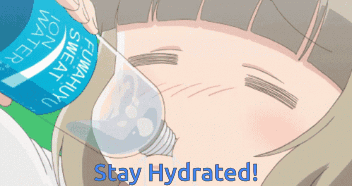

In [2]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
# dealing with the imbalance, we will over sample the dataset
from imblearn.over_sampling import RandomOverSampler
ran = RandomOverSampler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Loading the dataset 
df = pd.read_csv('waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
df['ammonia'] 

0        9.08
1       21.16
2       14.02
3       11.33
4       24.33
        ...  
7994     7.78
7995    24.22
7996     6.85
7997       10
7998     6.85
Name: ammonia, Length: 7999, dtype: object

In [5]:
# Removing the rows with "#NUM!" in ammonia column,and updating df
df = df[df['ammonia']!="#NUM!"]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [6]:
#Converting string to numeric
df['ammonia'] = pd.to_numeric(df['ammonia'])
df['is_safe'] = pd.to_numeric(df['is_safe'])


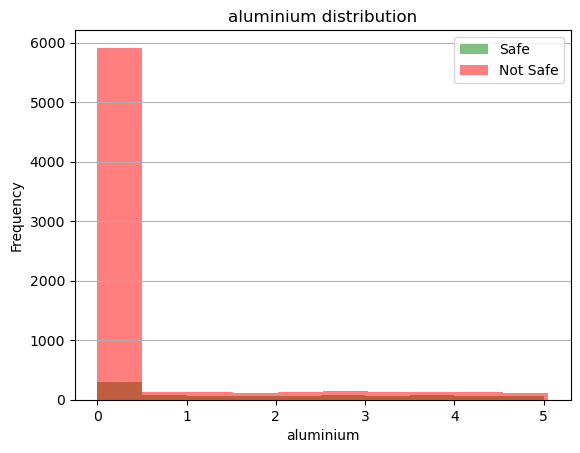

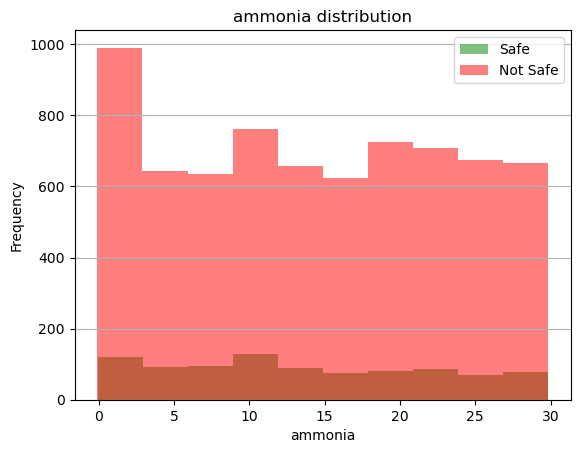

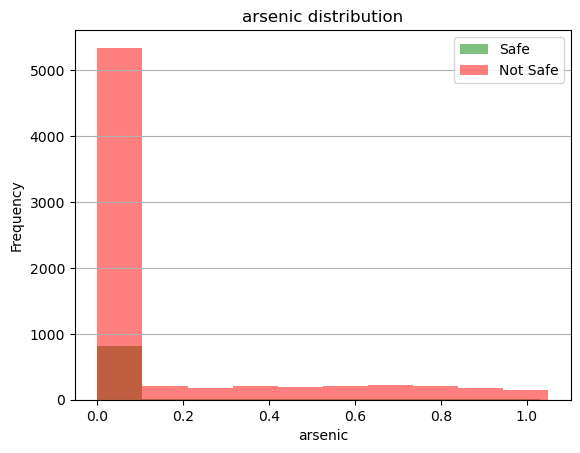

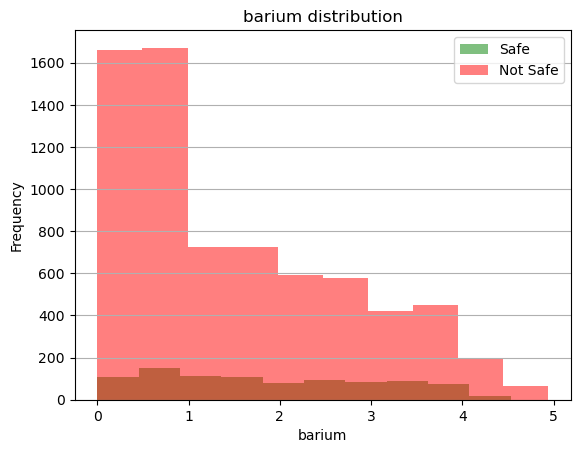

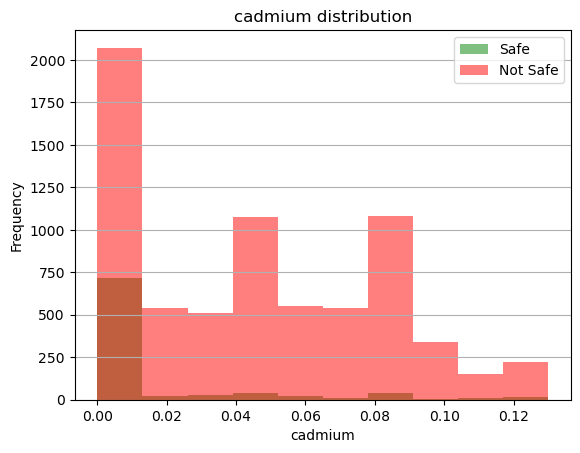

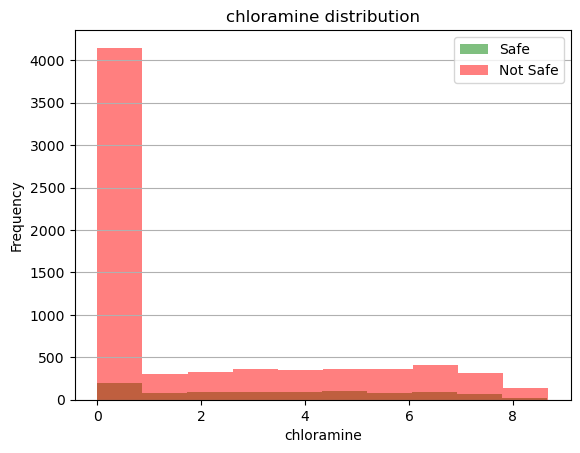

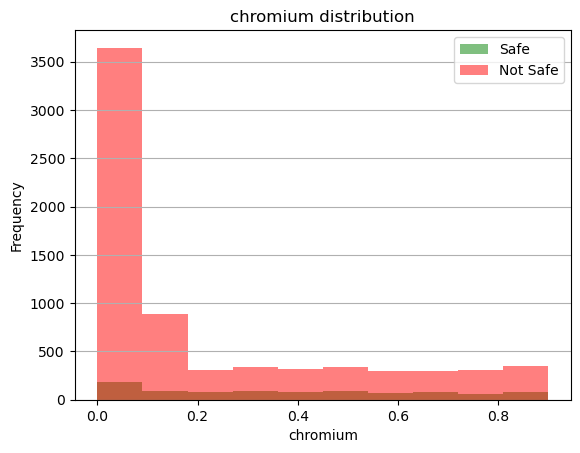

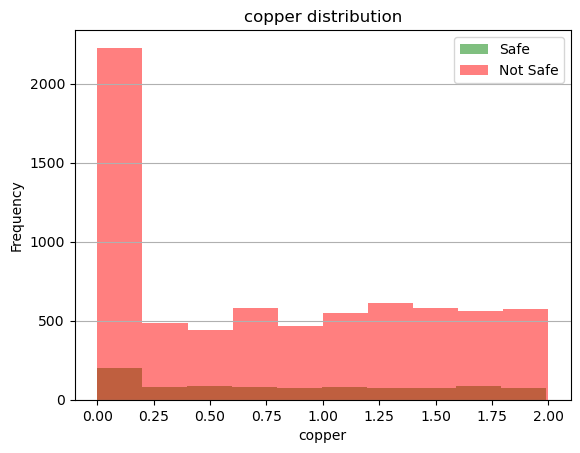

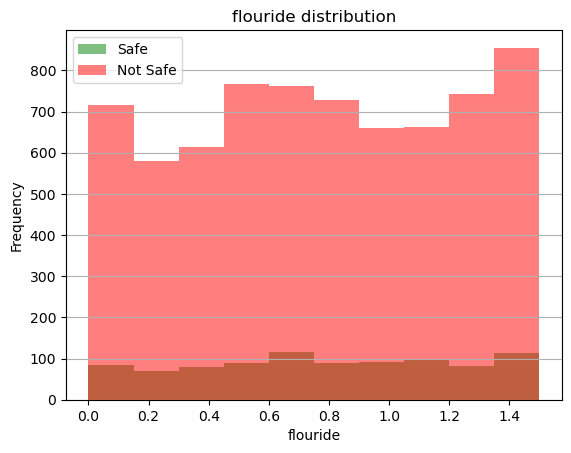

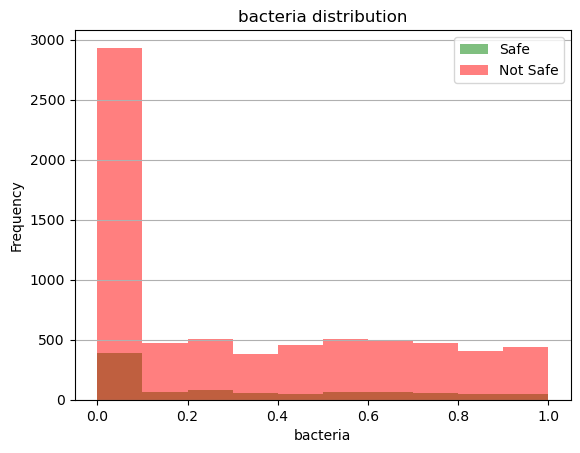

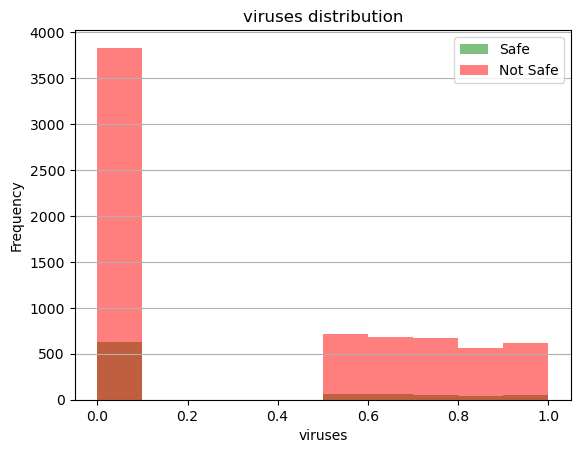

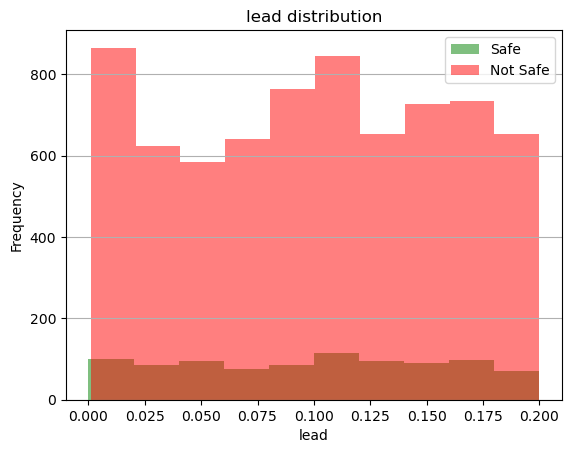

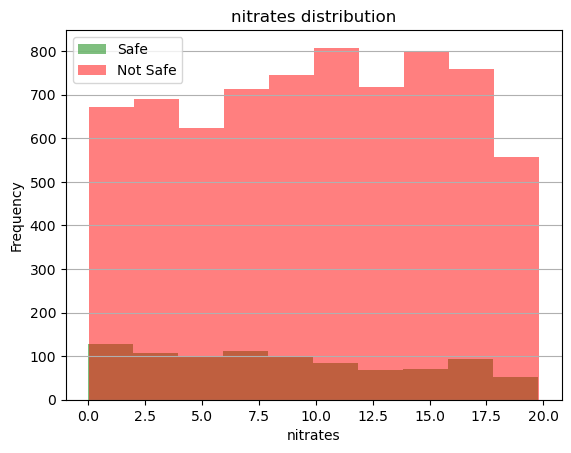

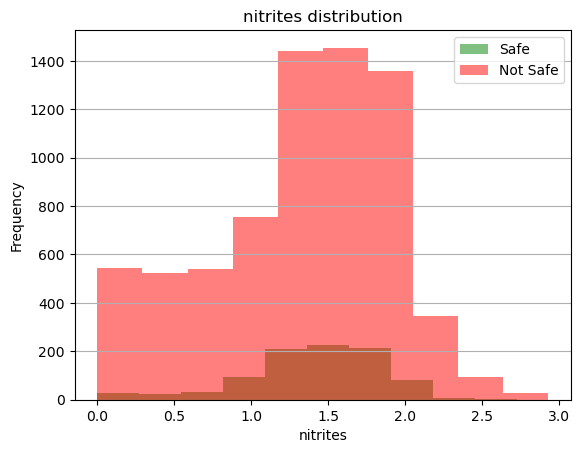

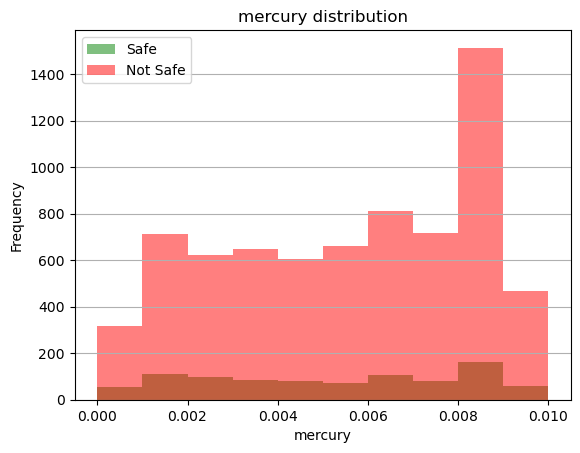

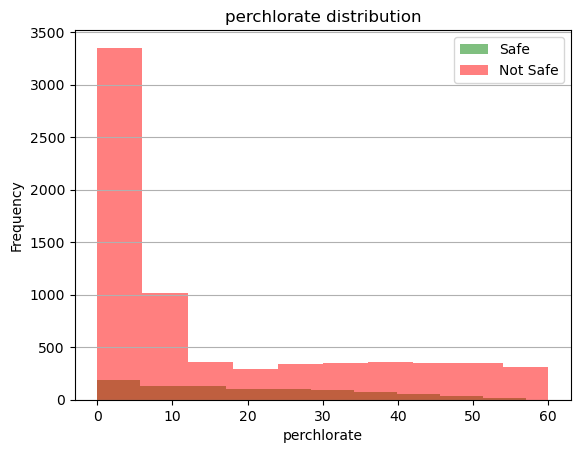

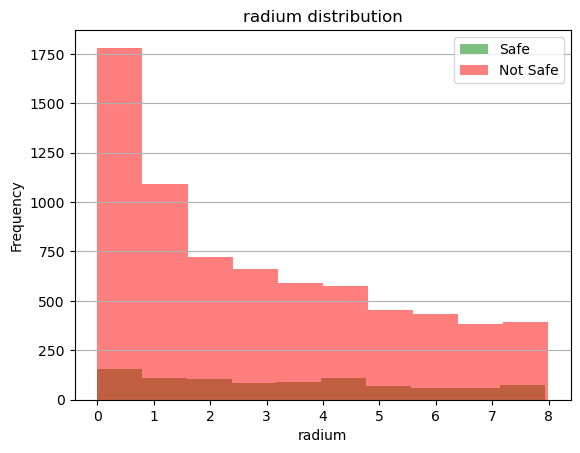

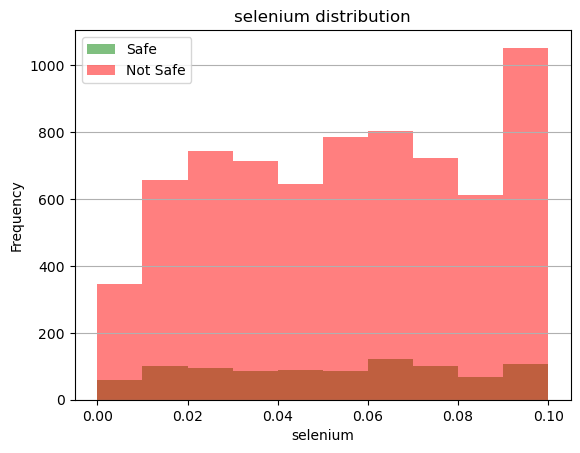

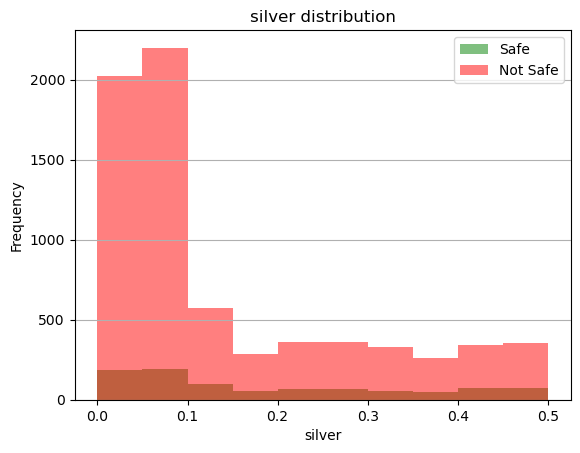

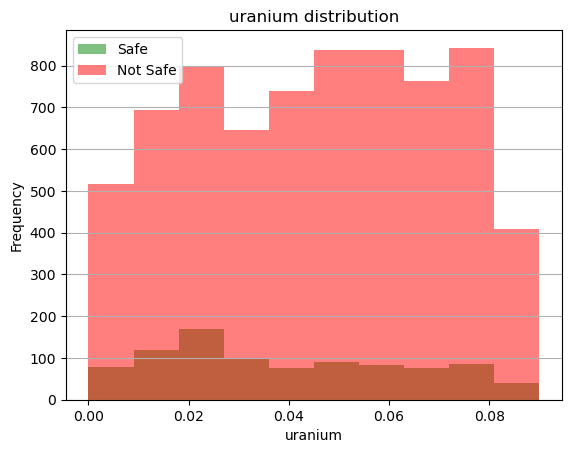

In [7]:
for i in df.columns[:-1]:
    plt.hist(df[df['is_safe']==1][i],color = 'green', alpha = 0.5,label= 'Safe')
    plt.hist(df[df['is_safe']==0][i],color = 'red', alpha = 0.5, label = 'Not Safe')
    plt.grid(axis='y')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(i + ' distribution')
    plt.legend()
    plt.show()

In [8]:
len(df[df['is_safe']==0]) # try putting 0,1

7084

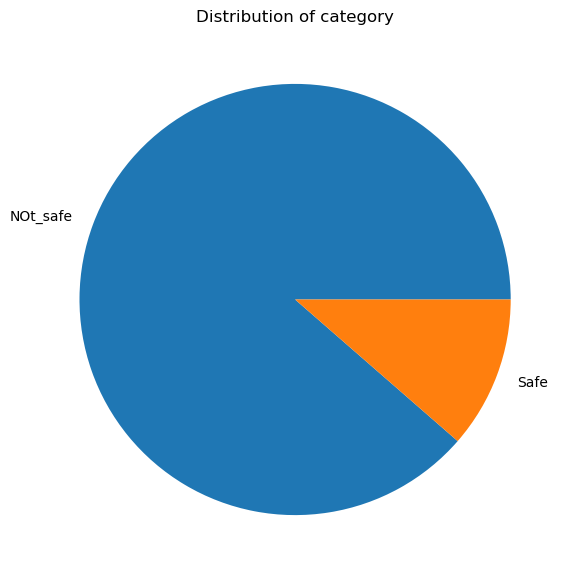

In [9]:
fig = plt.figure(figsize=(10, 7))
plt.pie([len(df[df['is_safe']==0]),len(df[df['is_safe']==1])],labels=['NOt_safe','Safe'])
plt.title('Distribution of category')
plt.show()
# WE have imbalance in our dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [11]:
# Creating input output, also resampling
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_resampled, y_resampled = ran.fit_resample(x, y)

In [12]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=11)

In [13]:
#model

water_classifier = RandomForestClassifier()
water_classifier.fit(x_train,y_train)
y_pred = water_classifier.predict(x_test)


In [14]:
print(classification_report(y_test,y_pred),'😱')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1430
           1       0.98      1.00      0.99      1404

    accuracy                           0.99      2834
   macro avg       0.99      0.99      0.99      2834
weighted avg       0.99      0.99      0.99      2834
 😱
